<a href="https://colab.research.google.com/github/medha130101/Minor_Project/blob/main/FERBasicFinal(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
%matplotlib inline

import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
#from livelossplot import PlotLossesKeras
# from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.7.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Load the Dataset from the ZIP File

In [3]:
!pip install livelossplot

In [4]:
 print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [5]:
! rm -rf train; mkdir train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/emotion.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/facesdb.zip' -d train
! unzip -q '/content/drive/My Drive/cs230 project/cs230-fer-master/datasets/fer2013/train.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/googlesearch.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/googleset.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/jaffe.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/umea.zip' -d train

In [6]:
! rm -rf dev; mkdir dev
! unzip -q '/content/drive/My Drive/cs230 project/cs230-fer-master/datasets/fer2013/test-public.zip' -d dev
! rm -rf test; mkdir test
! unzip -q '/content/drive/My Drive/cs230 project/cs230-fer-master/datasets/fer2013/test-private.zip' -d test

In [7]:
img_size = 48
batch_size = 64

# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("/content/train/train", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("/content/test/test-private", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [8]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


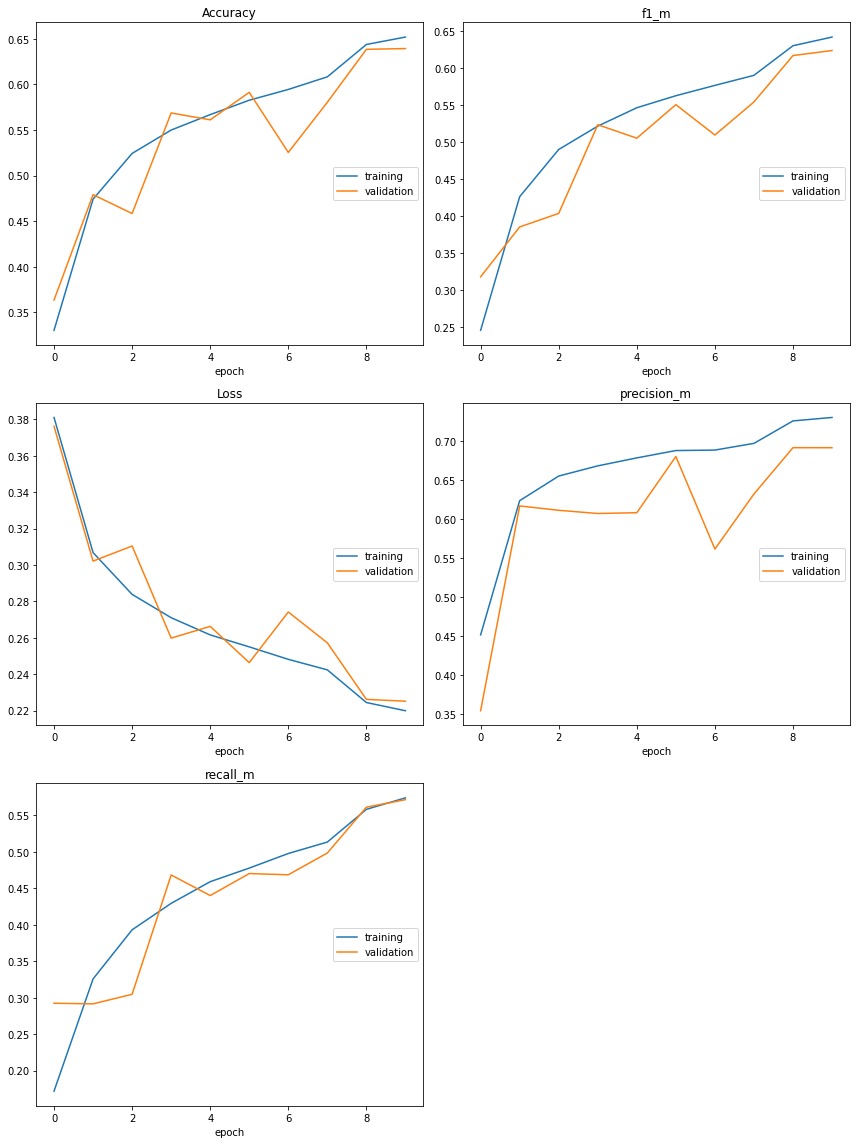

Accuracy
	training         	 (min:    0.330, max:    0.652, cur:    0.652)
	validation       	 (min:    0.364, max:    0.639, cur:    0.639)
f1_m
	training         	 (min:    0.246, max:    0.642, cur:    0.642)
	validation       	 (min:    0.318, max:    0.624, cur:    0.624)
Loss
	training         	 (min:    0.220, max:    0.381, cur:    0.220)
	validation       	 (min:    0.225, max:    0.376, cur:    0.225)
precision_m
	training         	 (min:    0.451, max:    0.731, cur:    0.731)
	validation       	 (min:    0.354, max:    0.692, cur:    0.692)
recall_m
	training         	 (min:    0.172, max:    0.574, cur:    0.574)
	validation       	 (min:    0.292, max:    0.571, cur:    0.571)

Epoch 00010: saving model to model_weights.h5
448/448 [==============================] - 30s 68ms/step - loss: 0.2199 - acc: 0.6518 - f1_m: 0.6422 - precision_m: 0.7306 - recall_m: 0.5739 - val_loss: 0.2252 - val_acc: 0.6392 - val_f1_m: 0.6240 - val_precision_m: 0.6918 - val_recall_m: 0.5714 - lr: 

In [9]:
from livelossplot import PlotLossesKeras
#from livelossplot import PlotLossesTensorFlowKeras
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

epochs = 10
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

callbacks = [PlotLossesKeras(), checkpoint, reduce_lr]

history = model.fit(
        x= train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks
)

In [10]:
print('\n# Evaluate on test data')
results_test = model.evaluate_generator(validation_generator)
print('test loss, test acc:', results_test)


# Evaluate on test data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


test loss, test acc: [0.22461043298244476, 0.6366676092147827, 0.626578152179718, 0.6886952519416809, 0.578125]


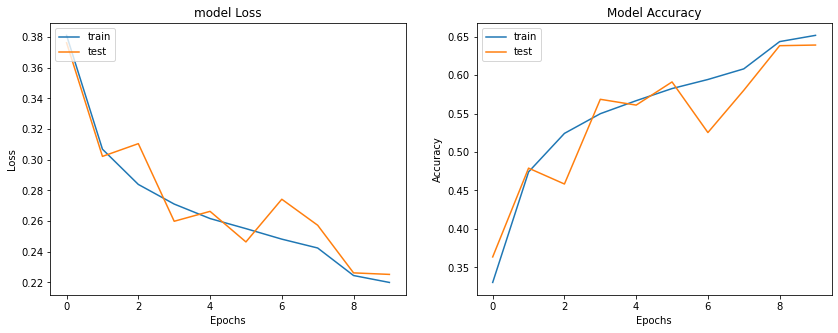

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion Matrix
[[ 513   38  384 1023  628  980  429]
 [  66    4   38  102   77   89   60]
 [ 559   39  405 1044  676  923  451]
 [ 938   68  706 1835 1162 1695  811]
 [ 661   62  458 1267  749 1187  581]
 [ 630   49  429 1240  801 1138  543]
 [ 420   33  267  831  538  722  360]]
Classification Report
              precision    recall  f1-score   support

       Anger       0.14      0.13      0.13      3995
     Disgust       0.01      0.01      0.01       436
        Fear       0.15      0.10      0.12      4097
       Happy       0.25      0.25      0.25      7215
     Neutral       0.16      0.15      0.16      4965
     Sadness       0.17      0.24      0.20      4830
    Surprise       0.11      0.11      0.11      3171

    accuracy                           0.17     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.17      0.17     28709



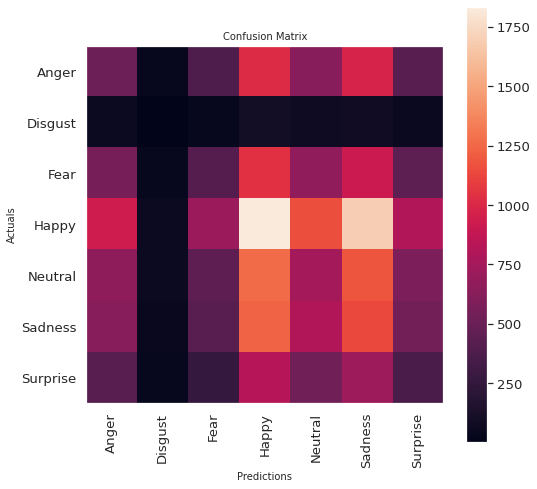

In [49]:
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = train_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}
Class_labels  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(CLASS_LABELS)
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.grid(False)
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

Confusion Matrix
[[279   8  33  27  39 100   5]
 [ 18  21   3   3   0   7   3]
 [ 75   5 175  23  36 148  66]
 [ 14   0  19 757  31  44  14]
 [ 40   2  27  36 364 150   7]
 [ 48   3  43  27  77 391   5]
 [  8   1  33  24  12  13 325]]
Classification Report
              precision    recall  f1-score   support

       Anger       0.58      0.57      0.57       491
     Disgust       0.53      0.38      0.44        55
        Fear       0.53      0.33      0.41       528
       Happy       0.84      0.86      0.85       879
     Neutral       0.65      0.58      0.61       626
     Sadness       0.46      0.66      0.54       594
    Surprise       0.76      0.78      0.77       416

    accuracy                           0.64      3589
   macro avg       0.62      0.59      0.60      3589
weighted avg       0.65      0.64      0.64      3589



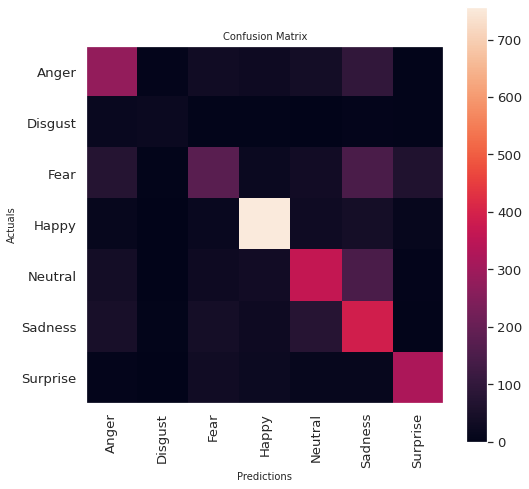

In [48]:
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}
Class_labels  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(CLASS_LABELS)
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.grid(False)
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

57/57 [==============================] - 2s 29ms/step - loss: 0.2237 - acc: 0.6417 - f1_m: 0.6349 - precision_m: 0.7009 - recall_m: 0.5833


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


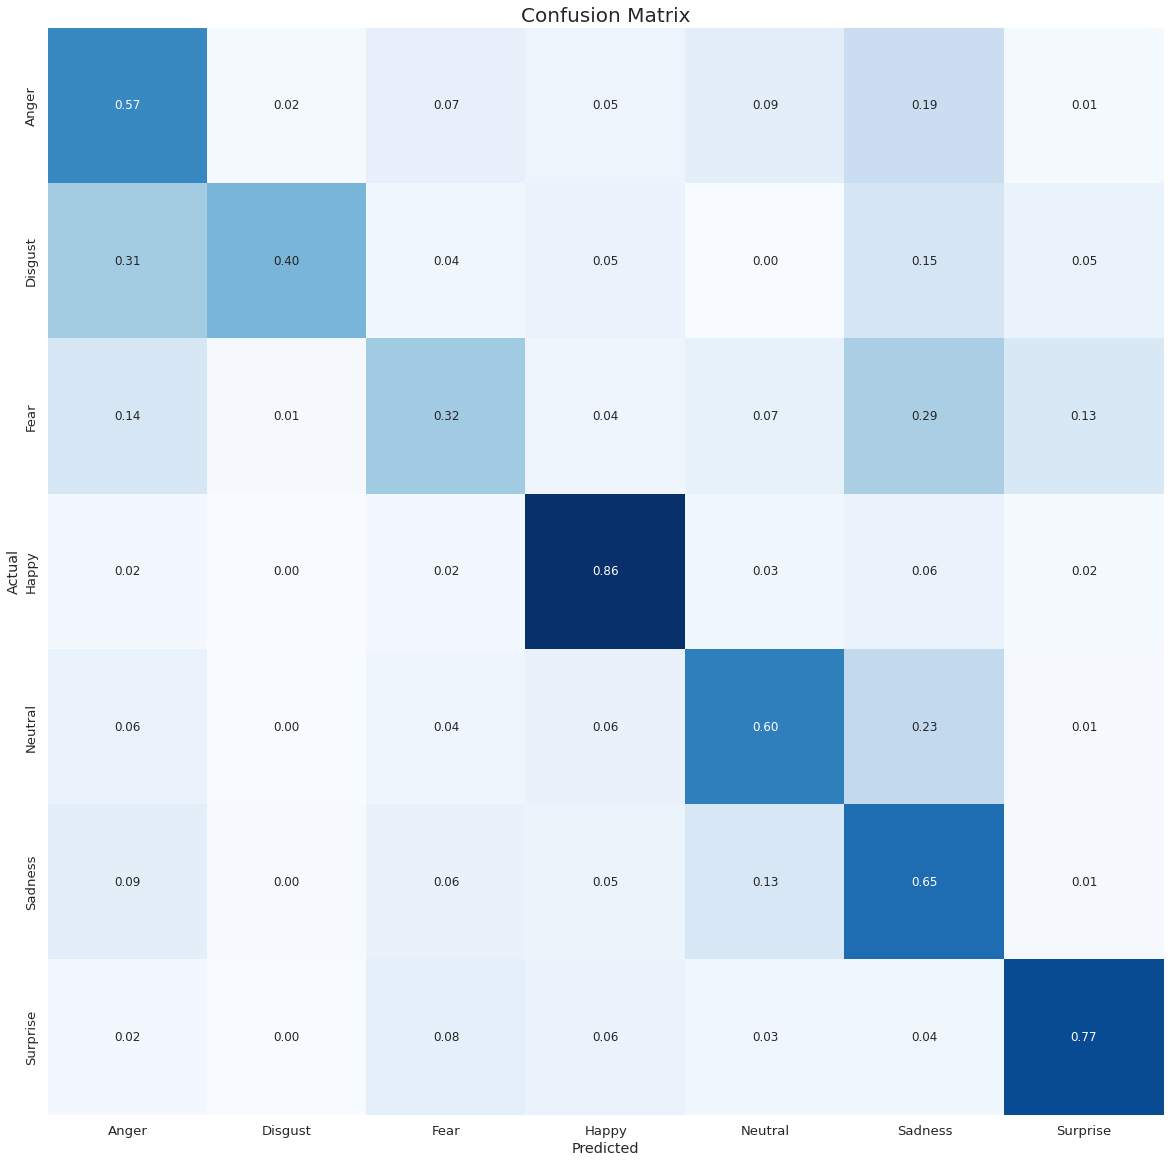

In [53]:
import seaborn as sns
import pandas as pd
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
CLASS_LABELS_EMOJIS = ["👿", "🤢" , "😱" , "😊" , "😐 ", "😔" , "😲" ]
model.evaluate(validation_generator)
preds = model.predict(validation_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(validation_generator.labels)
cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,20))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cmn, cbar=False,fmt='.2f', cmap="Blues", annot=True, annot_kws={"size": 12})

In [17]:
test_prob = model.predict(validation_generator)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == validation_generator.classes)

print(test_accuracy)

0.641404290888827


In [31]:

import pandas as pd
df = pd.DataFrame(cm)
print(df)

Predicted  Anger  Disgust  Fear  Happy  Neutral  Sadness  Surprise
Actual                                                            
Anger        279        7    33     25       45       96         6
Disgust       16       23     4      2        0        7         3
Fear          75        7   176     19       40      148        63
Happy         14        0    20    755       28       49        13
Neutral       40        2    25     38      375      139         7
Sadness       49        2    38     26       81      390         8
Surprise      10        1    37     22       13       11       322


In [35]:
conf_mat = confusion_matrix(validation_generator.classes, test_pred)

In [56]:
ranked_pred = np.argsort(test_prob, axis=1)
for k in range(7):
    correct = validation_generator.classes.reshape(-1,1) == ranked_pred[:, -(k+1):]
    top_k_acc = np.sum(correct) / len(validation_generator.classes)
    print(f'Top {k} Accuracy: {top_k_acc}')

Top 0 Accuracy: 0.641404290888827
Top 1 Accuracy: 0.82418500975202
Top 2 Accuracy: 0.9080523822791864
Top 3 Accuracy: 0.9651713569239343
Top 4 Accuracy: 0.9891334633602675
Top 5 Accuracy: 0.9972137085539148
Top 6 Accuracy: 1.0
